# Problem Statement

## Importing all necessary libraries

# The dataset Education - Post 12th Standard.csv is a dataset which contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [125]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read the dataset

In [126]:
df=pd.read_csv('C:\\Users\\krish\\OneDrive\\Desktop\\SHAMPA\\ISME\\Term IV_ 2020-22\\Foundation of Machine Learning_PGDM 2020-22\\PCA\\Education+-+Post+12th+Standard (1).csv')
df.head(5)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

## Get the dimension

In [128]:
df.shape

(777, 18)

In [129]:
df.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [130]:
df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

 We can see that all the attributes are either float or int except for the class attribute

## Summary of the dataset

In [131]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [132]:
df['Names'].unique()

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Agnes Scott College',
       'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College', 'Alfred University',
       'Allegheny College', 'Allentown Coll. of St. Francis de Sales',
       'Alma College', 'Alverno College',
       'American International College', 'Amherst College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Antioch University',
       'Appalachian State University', 'Aquinas College',
       'Arizona State University Main campus',
       'Arkansas College (Lyon College)', 'Arkansas Tech University',
       'Assumption College', 'Auburn University-Main Campus',
       'Augsburg College', 'Augustana College IL', 'Augustana College',
       'Austin College', 'Averett College', 'Baker University',
       'Baldwin-Wallace College', 'Barat College', 

## Check for null values

In [133]:
df.isna().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

There are multiple NA values with respect to each columns we will drop them

In [134]:
df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

## Check for duplicates

In [135]:
# Check for duplicate data
dups=df.duplicated()
dups.sum()

##No duplicate values


0

# Uni-variate analysis


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


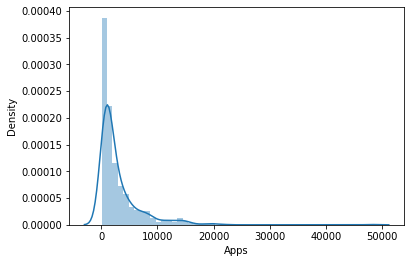

In [136]:
sns.distplot(df['Apps'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


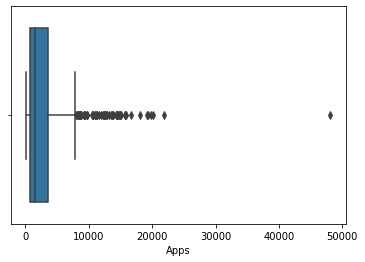

In [137]:
sns.boxplot(df['Apps'])

In [140]:

#fig, axes = plt.subplots(nrows=17,ncols=2)
#fig.set_size_inches(20, 20)
#plt.figure(figsize=(10,15))

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt

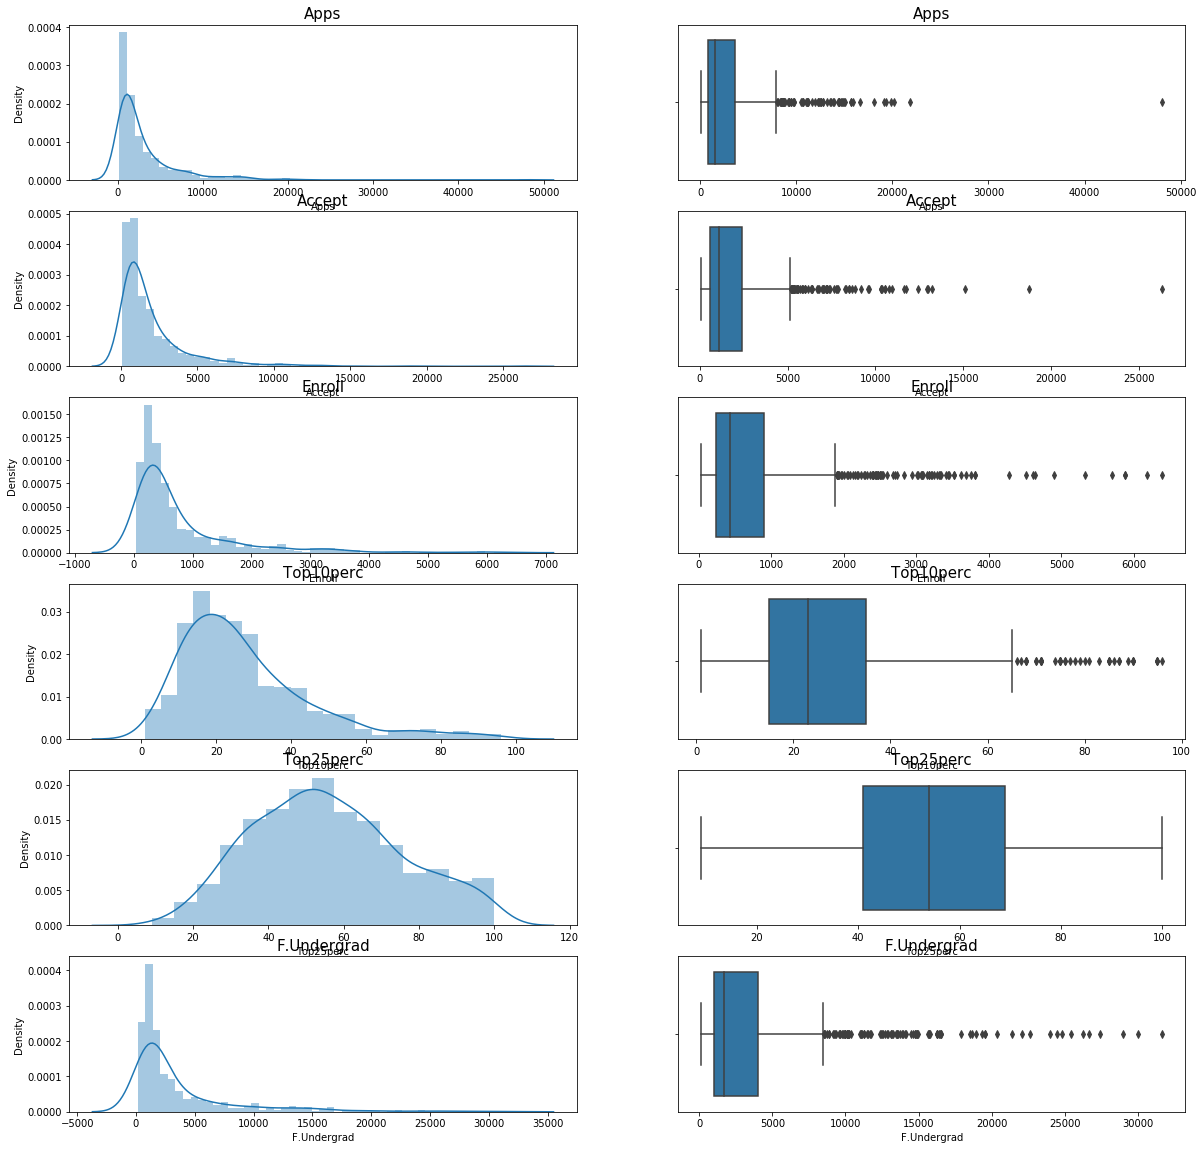

In [141]:
## Univariate except class column

fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(20, 20)
a = sns.distplot(df['Apps'] , ax=axes[0][0])
a.set_title('Apps',fontsize=15)
a = sns.boxplot(df['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title('Apps',fontsize=15)

a = sns.distplot(df['Accept'] , ax=axes[1][0])
a.set_title('Accept',fontsize=15)

a = sns.boxplot(df['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title('Accept',fontsize=15)

a = sns.distplot(df['Enroll'] , ax=axes[2][0])
a.set_title('Enroll',fontsize=15)

a = sns.boxplot(df['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title('Enroll',fontsize=15)


a = sns.distplot(df['Top10perc'] , ax=axes[3][0])
a.set_title('Top10perc',fontsize=15)

a = sns.boxplot(df['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title('Top10perc',fontsize=15)
a = sns.distplot(df['Top25perc'] , ax=axes[4][0])
a.set_title('Top25perc',fontsize=15)
a = sns.boxplot(df['Top25perc'] , orient = "v" , ax=axes[4][1])
a.set_title('Top25perc',fontsize=15)

a = sns.distplot(df['F.Undergrad'] , ax=axes[5][0])
a.set_title('F.Undergrad',fontsize=15)

a = sns.boxplot(df['F.Undergrad'] , orient = "v" , ax=axes[5][1])
a.set_title('F.Undergrad',fontsize=15)

plt.show()


We observe from the plots that the following variables have outliers -'Apps', 'Accept', 'Enroll', 'Top10perc', 
       'F.Undergrad' 

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt

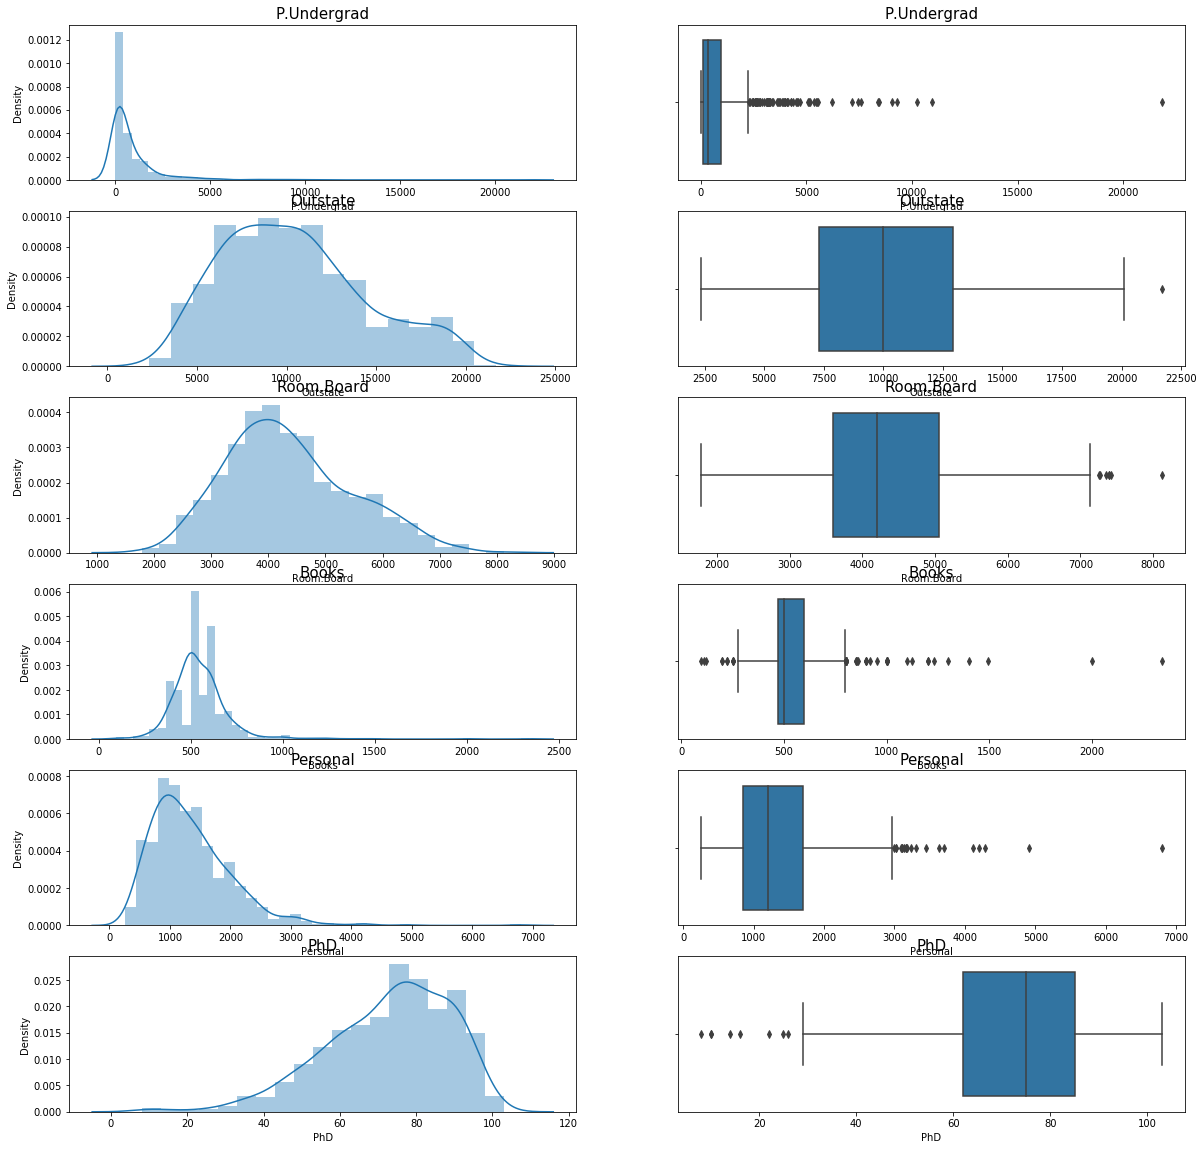

In [142]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(20, 20)
a = sns.distplot(df['P.Undergrad'] , ax=axes[0][0])
a.set_title('P.Undergrad',fontsize=15)

a = sns.boxplot(df['P.Undergrad'] , orient = "v" , ax=axes[0][1])
a.set_title('P.Undergrad',fontsize=15)


a = sns.distplot(df['Outstate'] , ax=axes[1][0])
a.set_title('Outstate',fontsize=15)

a = sns.boxplot(df['Outstate'] , orient = "v" , ax=axes[1][1])
a.set_title('Outstate',fontsize=15)

a = sns.distplot(df['Room.Board'] , ax=axes[2][0])
a.set_title('Room.Board',fontsize=15)
a = sns.boxplot(df['Room.Board'] , orient = "v" , ax=axes[2][1])
a.set_title('Room.Board',fontsize=15)

a = sns.distplot(df['Books'] , ax=axes[3][0])
a.set_title('Books',fontsize=15)

a = sns.boxplot(df['Books'] , orient = "v" , ax=axes[3][1])
a.set_title('Books',fontsize=15)

a = sns.distplot(df['Personal'] , ax=axes[4][0])
a.set_title('Personal',fontsize=15)

a = sns.boxplot(df['Personal'] , orient = "v" , ax=axes[4][1])
a.set_title('Personal',fontsize=15)


a = sns.distplot(df['PhD'] , ax=axes[5][0])
a.set_title('PhD',fontsize=15)

a = sns.boxplot(df['PhD'] , orient = "v" , ax=axes[5][1])
a.set_title('PhD',fontsize=15)
plt.show()

We observe from the plots that the following variables have outliers -'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD'

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt

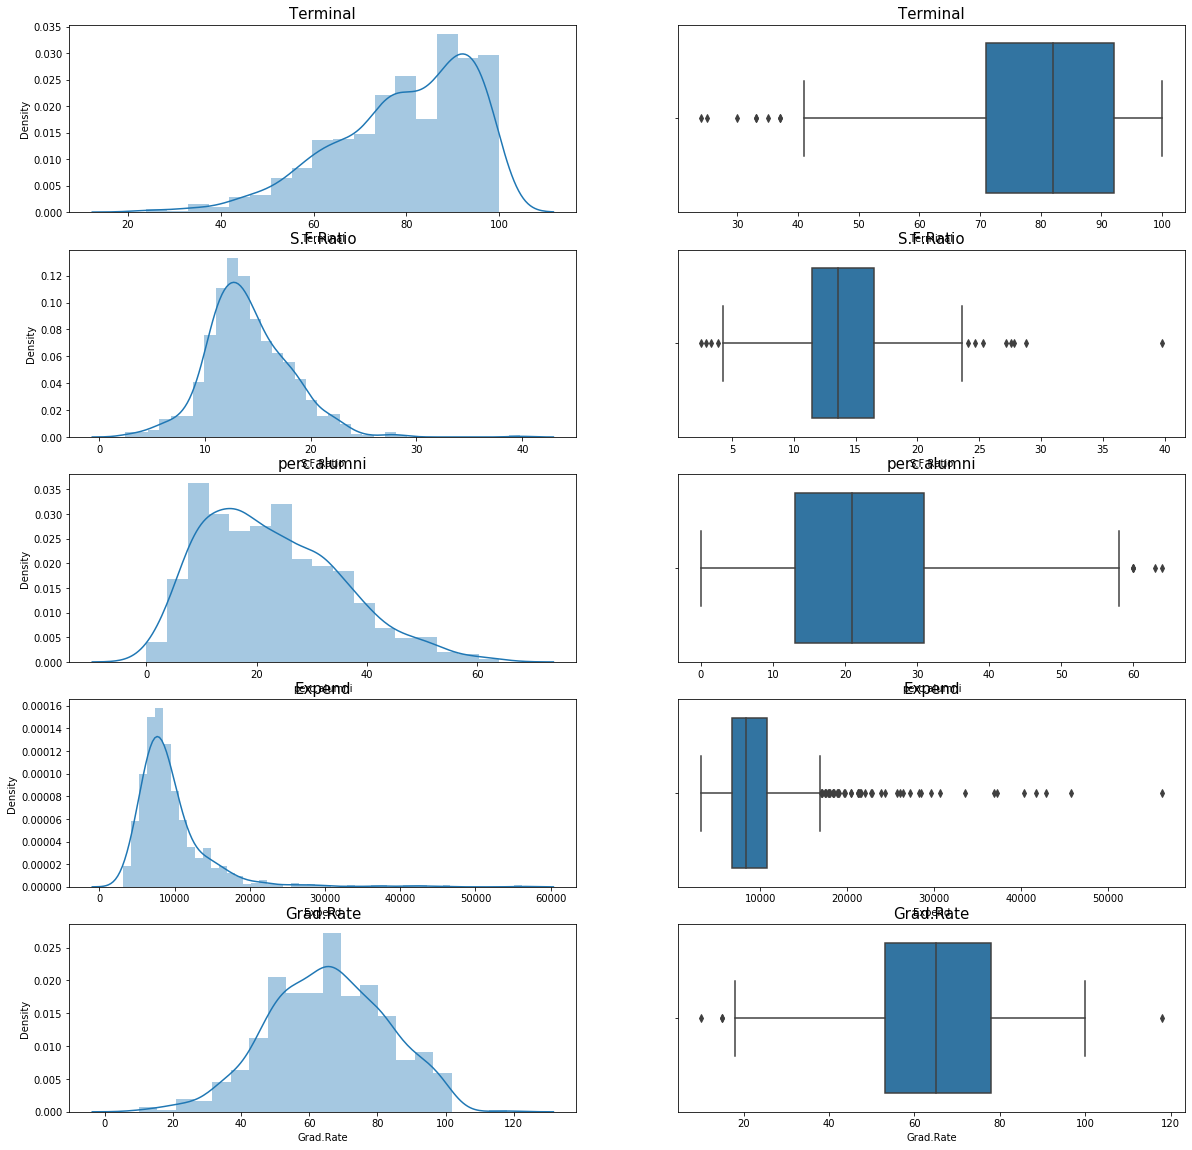

In [143]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20, 20)
a = sns.distplot(df['Terminal'] , ax=axes[0][0])
a.set_title('Terminal',fontsize=15)
a = sns.boxplot(df['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title('Terminal',fontsize=15)

a = sns.distplot(df['S.F.Ratio'] , ax=axes[1][0])
a.set_title('S.F.Ratio',fontsize=15)

a = sns.boxplot(df['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title('S.F.Ratio',fontsize=15)

a = sns.distplot(df['perc.alumni'] , ax=axes[2][0])
a.set_title('perc.alumni',fontsize=15)

a = sns.boxplot(df['perc.alumni'] , orient = "v" , ax=axes[2][1])
a.set_title('perc.alumni',fontsize=15)


a = sns.distplot(df['Expend'] , ax=axes[3][0])
a.set_title('Expend',fontsize=15)

a = sns.boxplot(df['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title('Expend',fontsize=15)

a = sns.distplot(df['Grad.Rate'] , ax=axes[4][0])
a.set_title('Grad.Rate',fontsize=15)

a = sns.boxplot(df['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title('Grad.Rate',fontsize=15)
plt.show()

In [144]:
df.cov()

Apps        Accept        Enroll     Top10perc  \
Apps         1.497846e+07  8.949860e+06  3.045256e+06  23132.773138   
Accept       8.949860e+06  6.007960e+06  2.076268e+06   8321.124872   
Enroll       3.045256e+06  2.076268e+06  8.633684e+05   2971.583415   
Top10perc    2.313277e+04  8.321125e+03  2.971583e+03    311.182456   
Top25perc    2.695266e+04  1.201340e+04  4.172592e+03    311.630480   
F.Undergrad  1.528970e+07  1.039358e+07  4.347530e+06  12089.113681   
P.Undergrad  2.346620e+06  1.646670e+06  7.257907e+05  -2829.474981   
Outstate     7.809704e+05 -2.539623e+05 -5.811885e+05  39907.179832   
Room.Board   7.000729e+05  2.443471e+05 -4.099706e+04   7186.705605   
Books        8.470375e+04  4.594281e+04  1.729120e+04    346.177405   
Personal     4.683468e+05  3.335566e+05  1.767380e+05  -1114.551186   
PhD          2.468943e+04  1.423820e+04  5.028961e+03    153.184870   
Terminal     2.105307e+04  1.218209e+04  4.217086e+03    127.551581   
S.F.Ratio    1.465061e+03  1.709838e+03  8.726848e+02    -26.874525   
perc.alumni -4.327122e+03 -4.859487e+03 -2.081694e+03     99.567208   
Expend       5.246171e+06  1.596272e+06  3.113454e+05  60879.310196   
Grad.Rate    9.756422e+03  2.834163e+03 -3.565880e+02    149.992164   

                Top25perc   F.Undergrad   P.Undergrad      Outstate  \
Apps         26952.663479  1.528970e+07  2.346620e+06  7.809704e+05   
Accept       12013.404757  1.039358e+07  1.646670e+06 -2.539623e+05   
Enroll        4172.592435  4.347530e+06  7.257907e+05 -5.811885e+05   
Top10perc      311.630480  1.208911e+04 -2.829475e+03  3.990718e+04   
Top25perc      392.229216  1.915895e+04 -1.615412e+03  3.899243e+04   
F.Undergrad  19158.952782  2.352658e+07  4.212910e+06 -4.209843e+06   
P.Undergrad  -1615.412144  4.212910e+06  2.317799e+06 -1.552704e+06   
Outstate     38992.427500 -4.209843e+06 -1.552704e+06  1.618466e+07   
Room.Board    7199.903568 -3.664582e+05 -1.023919e+05  2.886597e+06   
Books          377.759266  9.253576e+04  2.041045e+04  2.580824e+04   
Personal     -1083.605065  1.041709e+06  3.297324e+05 -8.146737e+05   
PhD            176.518449  2.521178e+04  3.706756e+03  2.515752e+04   
Terminal       153.002612  2.142424e+04  3.180597e+03  2.416415e+04   
S.F.Ratio      -23.097199  5.370209e+03  1.401303e+03 -8.835254e+03   
perc.alumni    102.550946 -1.379193e+04 -5.297337e+03  2.822955e+04   
Expend       54546.483305  4.724040e+05 -6.643512e+05  1.413324e+07   
Grad.Rate      162.371398 -6.563308e+03 -6.721062e+03  3.947968e+04   

               Room.Board         Books      Personal           PhD  \
Apps         7.000729e+05  84703.752639  4.683468e+05  24689.433666   
Accept       2.443471e+05  45942.807867  3.335566e+05  14238.201489   
Enroll      -4.099706e+04  17291.199742  1.767380e+05   5028.961166   
Top10perc    7.186706e+03    346.177405 -1.114551e+03    153.184870   
Top25perc    7.199904e+03    377.759266 -1.083605e+03    176.518449   
F.Undergrad -3.664582e+05  92535.764728  1.041709e+06  25211.784197   
P.Undergrad -1.023919e+05  20410.446674  3.297324e+05   3706.756219   
Outstate     2.886597e+06  25808.242145 -8.146737e+05  25157.515051   
Room.Board   1.202743e+06  23170.313390 -1.480838e+05   5895.034749   
Books        2.317031e+04  27259.779946  2.004303e+04     72.534242   
Personal    -1.480838e+05  20043.025650  4.584258e+05   -120.898783   
PhD          5.895035e+03     72.534242 -1.208988e+02    266.608636   
Terminal     6.047300e+03    242.963918 -3.051542e+02    204.231332   
S.F.Ratio   -1.574206e+03    -20.867207  3.654158e+02     -8.436492   
perc.alumni  3.701431e+03    -82.263132 -2.399311e+03     50.383230   
Expend       2.873308e+06  96912.580326 -3.460978e+05  36898.058233   
Grad.Rate    8.005360e+03      3.008837 -3.132615e+03     85.557109   

                 Terminal     S.F.Ratio   perc.alumni        Expend  \
Apps         21053.067602   1465.060576  -4327.122381  5.246171e+06   
Accept       12182.093828   1709.838189  -

We observe from the plots that the following variables have outliers 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'

# Bi- Variate Analysis:

In [145]:
df.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

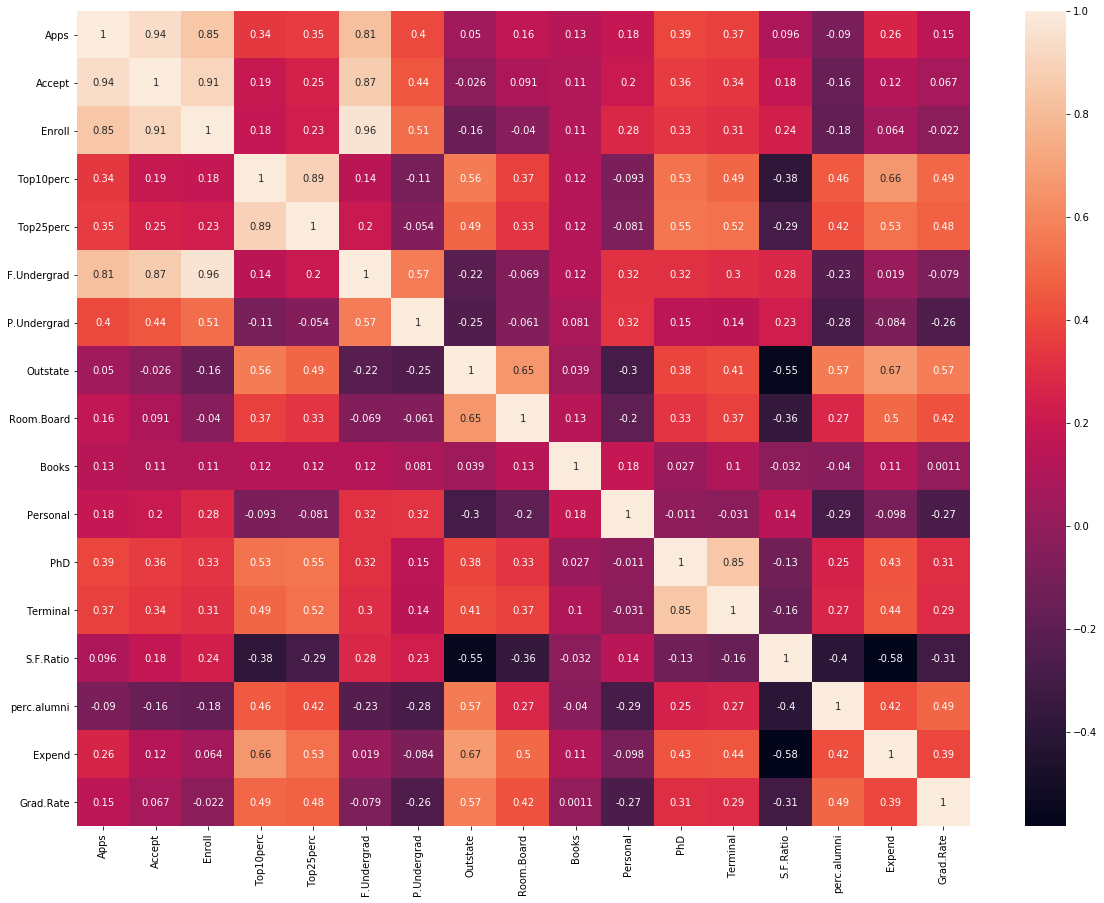

In [147]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)  # plot the correlation coefficients as a heatmap

We can see that many columns are co-related to each other or in other words the correlation exists for many columns and the highest is between max-length_rectangularity and circularity

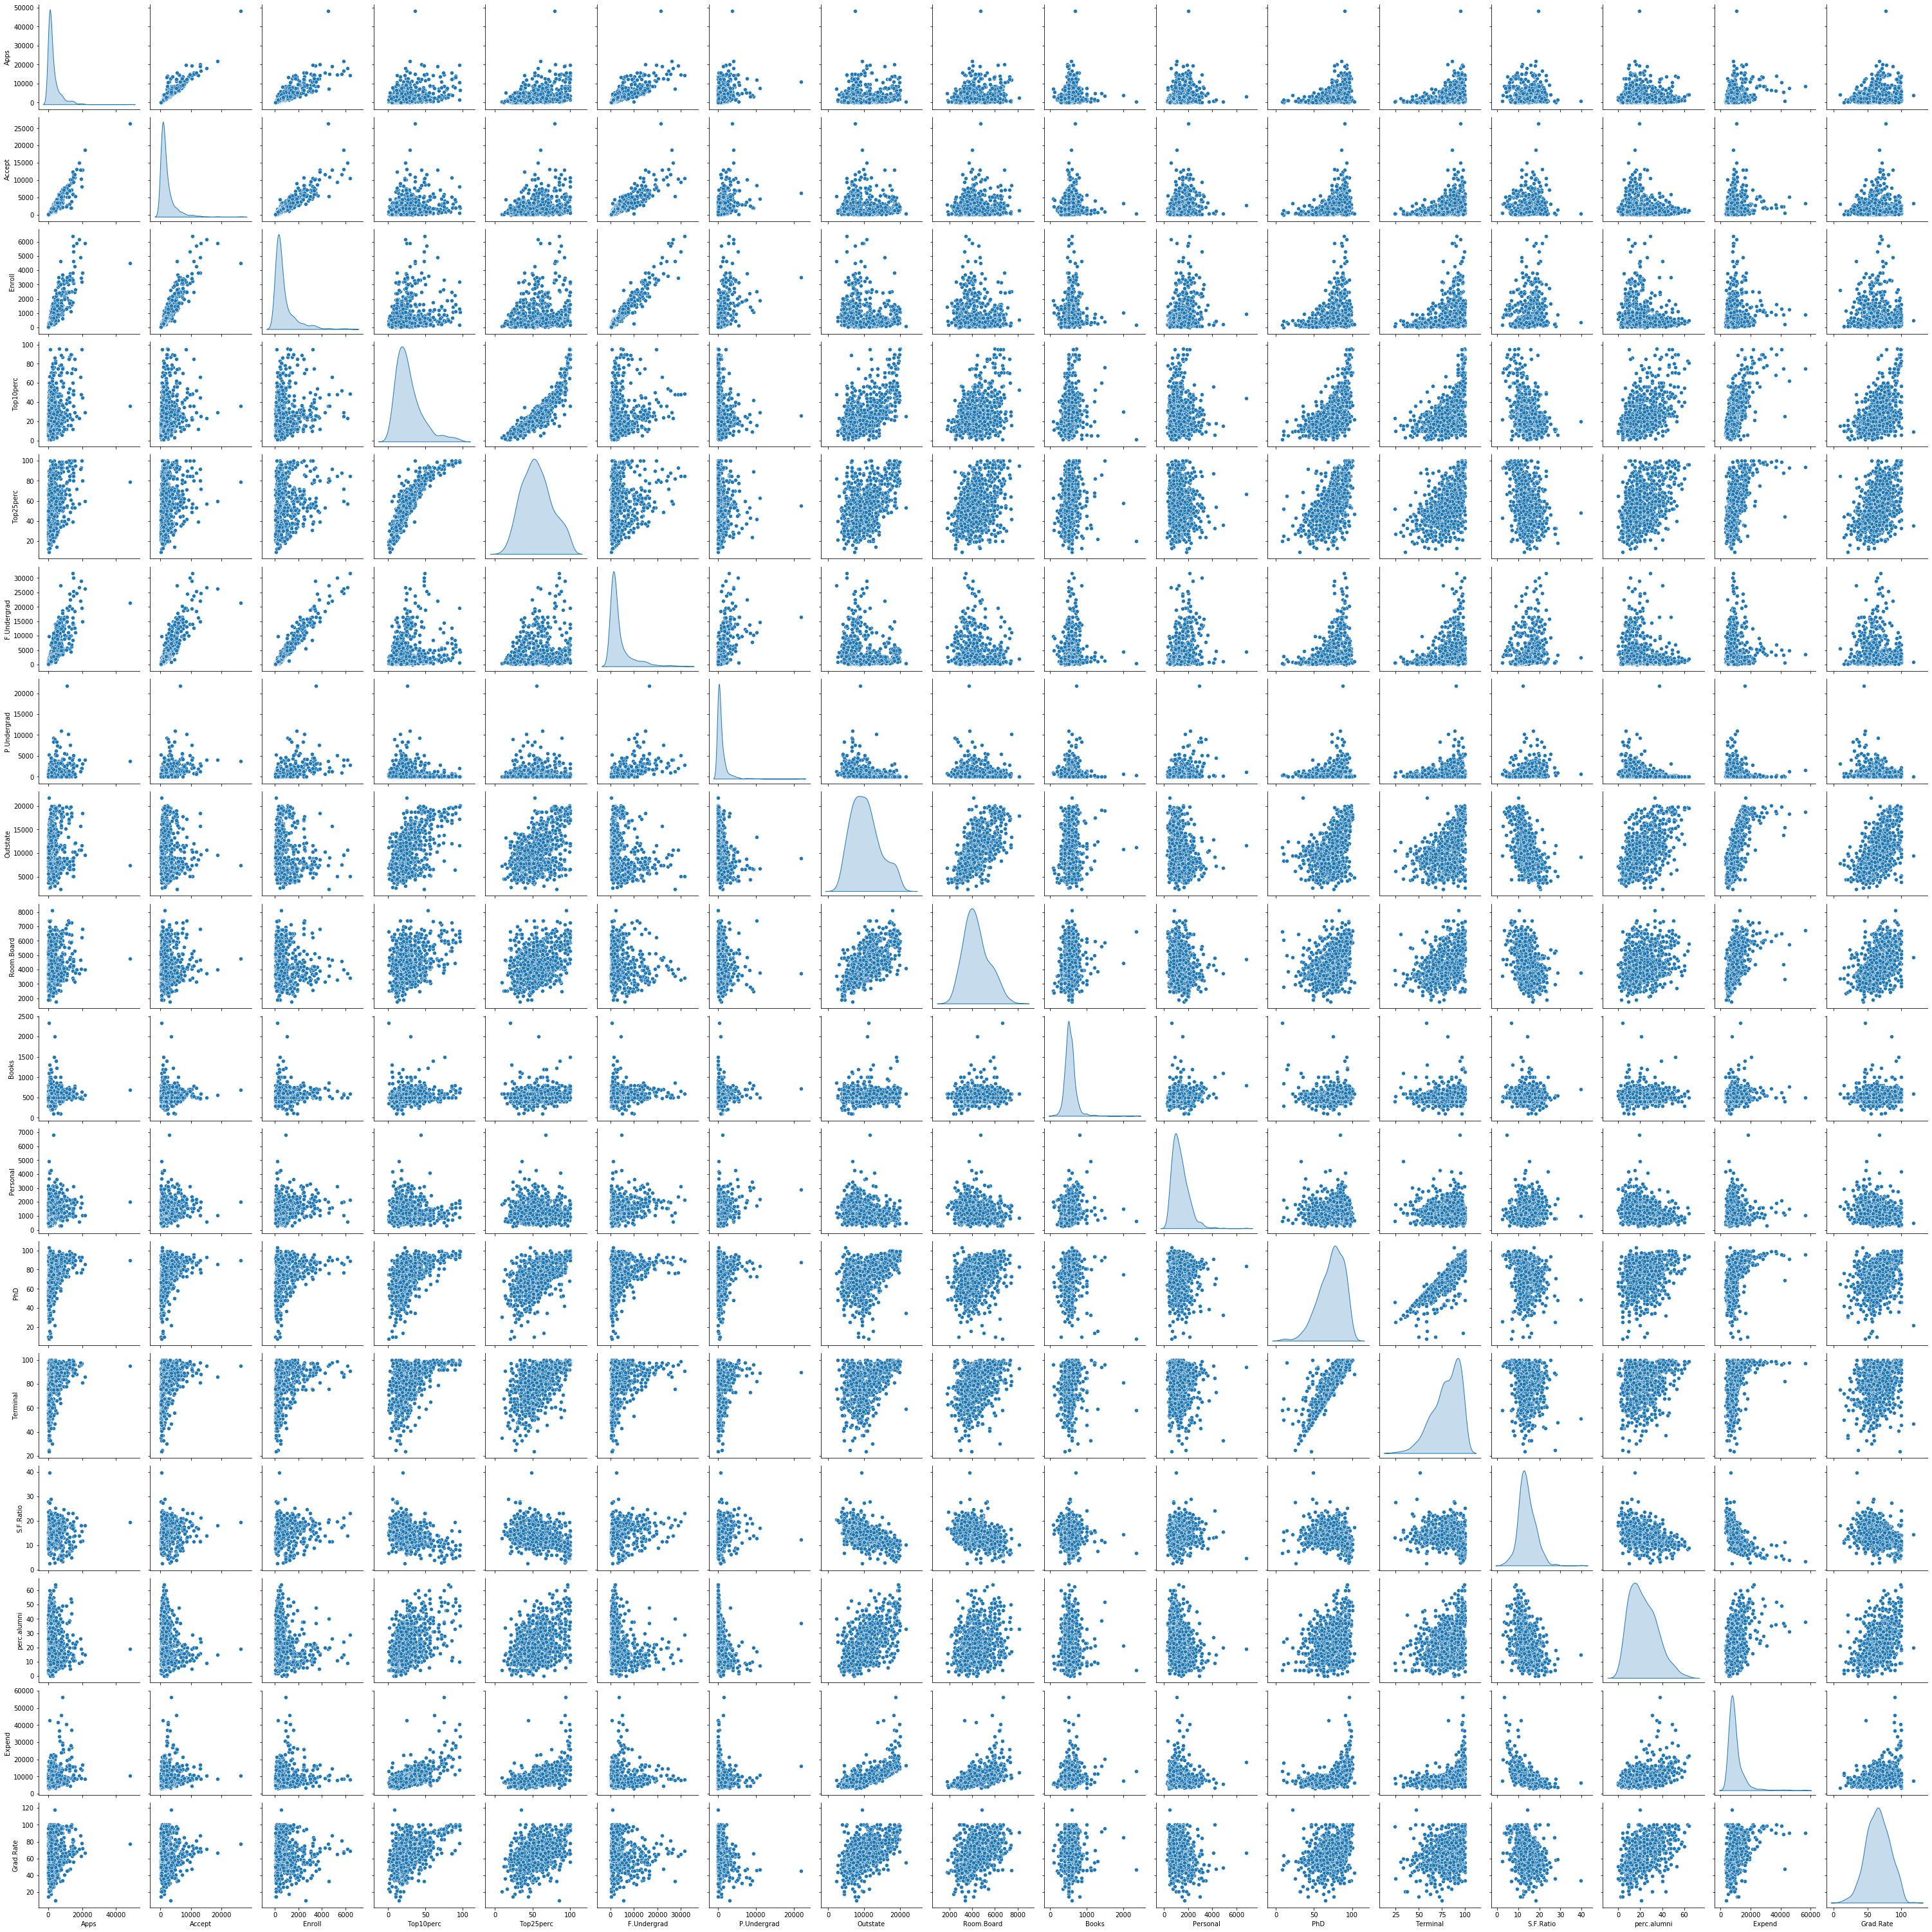

In [26]:
#Let us check for pair plots
sns.pairplot(df,diag_kind='kde')

Drop the "Names" column

In [149]:
print(type(df))
print(df.columns)
df_new=df.drop(['Names','Grad.Rate'], axis=1)
print(df_new.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')
Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend'],
      dtype='object')


Scale the variables

In [150]:
df_new.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  
0           12    7041  
1           16   10527  
2           30    8735  
3           37   19016  
4            2   10922

In [151]:
df_new.shape

(777, 16)

In [93]:
#from sklearn.preprocessing import StandardScaler
#SC=StandardScaler()
#SC.fit_transform(df_new)

#### To check outliers after Standardizing the column variables, let us try to handle them by using custom function

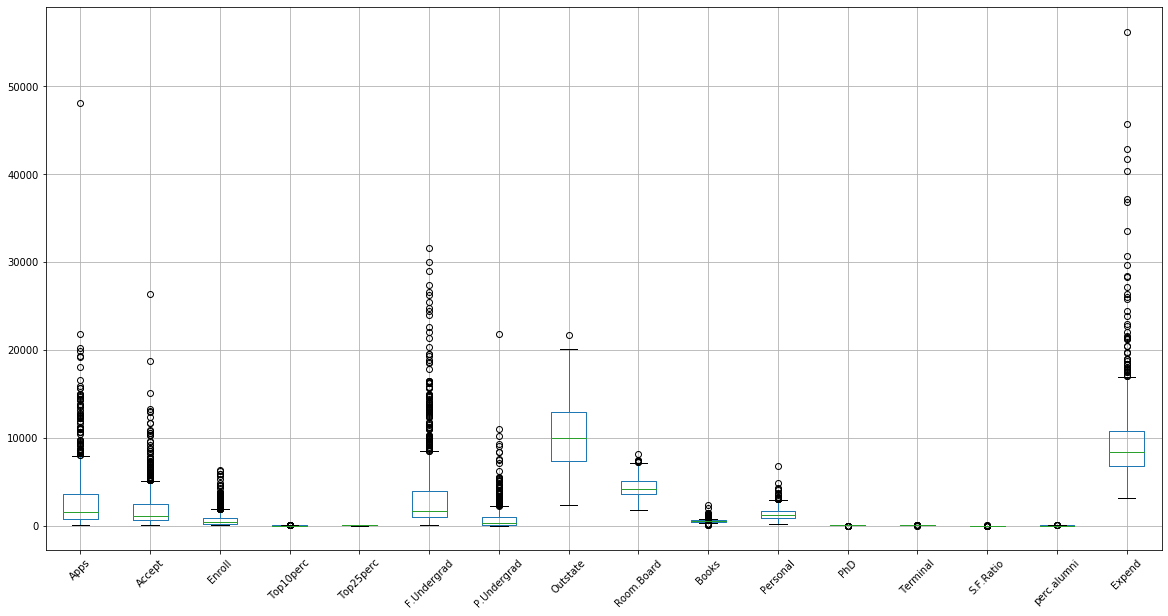

In [94]:
df_new.boxplot(figsize=(20,10))
plt.xticks(rotation=45)
plt.show()


# It is observed that all the variables (after standardizing) except "Top25Perc" have outliers. The same case is observed before standardization also

# Outlier treatment :  Imputing the upper outliers by upper Whisker and Lower outliers by Lower Whiskers.
## To do that define a custom function-

In [95]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [152]:
 for column in df_new.columns:
    lr,ur=remove_outlier(df_new[column])
    df_new[column]=np.where(df_new[column]>ur,ur, df_new[column])
    df_new[column]=np.where(df_new[column]<lr,lr,df_new[column])

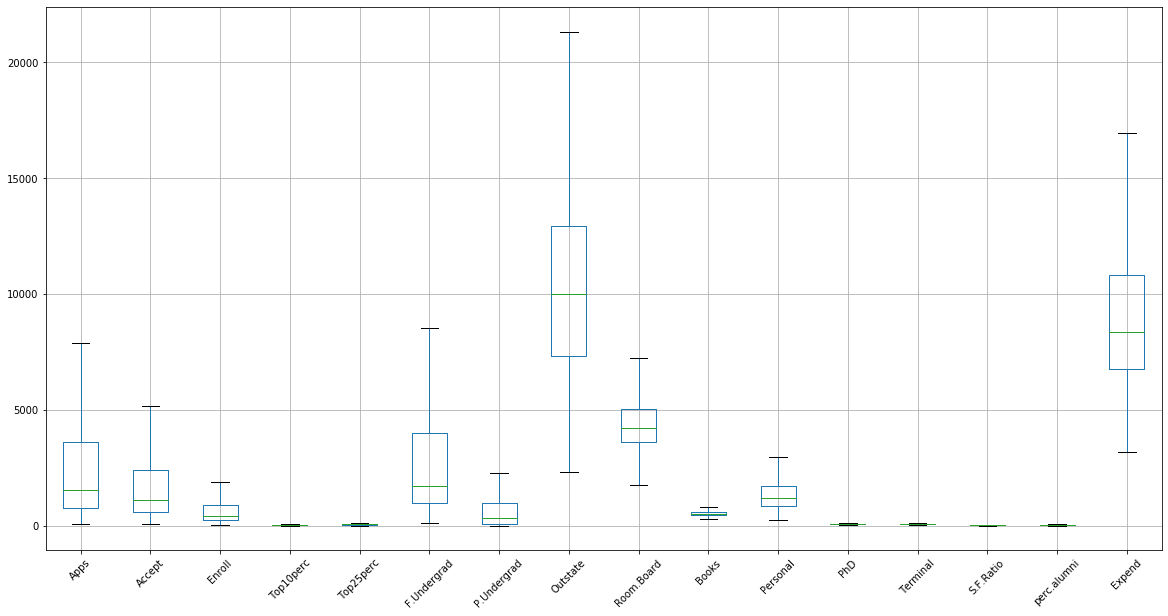

In [153]:
df_new.boxplot(figsize=(20,10))
plt.xticks(rotation=45)
plt.show()


In [154]:
df_new.head(3)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660.0  1232.0   721.0       23.0       52.0       2885.0        537.0   
1  2186.0  1924.0   512.0       16.0       29.0       2683.0       1227.0   
2  1428.0  1097.0   336.0       22.0       50.0       1036.0         99.0   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0    7440.0      3300.0  450.0    2200.0  70.0      78.0       18.1   
1   12280.0      6450.0  750.0    1500.0  29.0      39.5       12.2   
2   11250.0      3750.0  400.0    1165.0  53.0      66.0       12.9   

   perc.alumni   Expend  
0         12.0   7041.0  
1         16.0  10527.0  
2         30.0   8735.0

In [155]:
df_new.shape

(777, 16)

In [156]:
df_new.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   

             Terminal  S.F.Ratio  perc.alumni    Expend  
Apps         0.434478   0.126411    -0.101158  0.242935  
Accept       0.403409   0.188506    -0.165516  0.161808  
Enroll       0.354379   0.274269    -0.222723  0.054221  
Top10perc    0.506748  -0.387926     0.455797  0.657039  
Top25perc    0.527654  -0.297233     0.416832  0.572905  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  
Outstate     0.412579  -0.573683     0.565736  0.775328  
Room.Board   0.379270  -0.376430     0.272393  0.580622  
Books        0.159318  -0.008536    -0.042832  0.149983  
Personal    -0.031971   0.173913    -0.305753 -0.163271  
PhD          0.862928  -0.129390     0.248877  0.510529  
Terminal     1.000000  -0.150993     0.266033  0.524068  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  
perc.alumni  0.266033  -0.412101     1.000000  0.462922  
Expend       0.524068  -0.654376     0.462922  1.000000

# Standardization of data

In [157]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
df_s=Sc.fit_transform(df)

ImportError: cannot import name 'StandardScaler' from 'sklearn' (C:\anaconda3\lib\site-packages\sklearn\__init__.py)

In [106]:
##standardize
from scipy.stats import zscore
df_std=df_new.apply(zscore)
df_std.head(3)

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   

   S.F.Ratio  perc.alumni    Expend  
0   1.070602    -0.870466 -0.630916  
1  -0.489511    -0.545726  0.396097  
2  -0.304413     0.590864 -0.131845

# Create a covariance matrix for identifying Principal components

In [159]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(df_std.T)
cov_matrix
##cov_mat=np.cov(df_new.T)


array([[ 1.00128866e+00,  9.56537704e-01,  8.98039052e-01,
         3.21756324e-01,  3.64960691e-01,  8.62111140e-01,
         5.20492952e-01,  6.54209711e-02,  1.87717056e-01,
         2.36441941e-01,  2.30243993e-01,  4.64521757e-01,
         4.35037784e-01,  1.26573895e-01, -1.01288006e-01,
         2.43248206e-01],
       [ 9.56537704e-01,  1.00128866e+00,  9.36482483e-01,
         2.23586208e-01,  2.74033187e-01,  8.98189799e-01,
         5.73428908e-01, -5.00874847e-03,  1.19740419e-01,
         2.08974091e-01,  2.56676290e-01,  4.27891234e-01,
         4.03929238e-01,  1.88748711e-01, -1.65728801e-01,
         1.62016688e-01],
       [ 8.98039052e-01,  9.36482483e-01,  1.00128866e+00,
         1.71977357e-01,  2.30730728e-01,  9.68548601e-01,
         6.42421828e-01, -1.55856056e-01, -2.38762560e-02,
         2.02317274e-01,  3.39785395e-01,  3.82031198e-01,
         3.54835877e-01,  2.74622251e-01, -2.23009677e-01,
         5.42906862e-02],
       [ 3.21756324e-01,  2.23586208e

In [160]:
#Even if we take the transpose of the covariance matrix it results in same value as that of the above
df_new.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   

             Terminal  S.F.Ratio  perc.alumni    Expend  
Apps         0.434478   0.126411    -0.101158  0.242935  
Accept       0.403409   0.188506    -0.165516  0.161808  
Enroll       0.354379   0.274269    -0.222723  0.054221  
Top10perc    0.506748  -0.387926     0.455797  0.657039  
Top25perc    0.527654  -0.297233     0.416832  0.572905  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  
Outstate     0.412579  -0.573683     0.565736  0.775328  
Room.Board   0.379270  -0.376430     0.272393  0.580622  
Books        0.159318  -0.008536    -0.042832  0.149983  
Personal    -0.031971   0.173913    -0.305753 -0.163271  
PhD          0.862928  -0.129390     0.248877  0.510529  
Terminal     1.000000  -0.150993     0.266033  0.524068  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  
perc.alumni  0.266033  -0.412101     1.000000  0.462922  
Expend       0.524068  -0.654376     0.462922  1.000000

# Identify eigen values and eigen vector

In [161]:
# Step 2- Get eigen values and eigen vector

eig_vals, eig_vecs= np.linalg.eig(cov_matrix)
eig_vals


array([5.42718384, 4.72114629, 1.09436147, 1.00334436, 0.83121138,
       0.71640953, 0.55084215, 0.40858254, 0.49112607, 0.24929115,
       0.02239683, 0.03799928, 0.15794144, 0.13523552, 0.09885216,
       0.07469455])

In [163]:
eig_vecs

array([[ 3.37112702e-01,  2.32076314e-01,  5.60910696e-02,
        -1.03313261e-01, -2.13255405e-01,  1.14114537e-01,
        -8.37348553e-02,  2.04821091e-01, -1.12293228e-03,
        -8.46892940e-02, -1.81068155e-01, -5.96743848e-01,
        -9.74416168e-02, -7.10657017e-02, -5.48251975e-01,
         4.97059354e-03],
       [ 3.14299268e-01,  2.71023204e-01,  8.72771587e-02,
        -1.20395695e-01, -1.94036779e-01,  8.49577513e-02,
        -1.28549044e-01,  2.05193131e-01, -2.95202896e-02,
        -4.11907546e-02,  3.90661962e-01,  6.64510880e-01,
        -1.46358212e-01, -1.10977323e-02, -2.89263240e-01,
         1.32697530e-02],
       [ 2.84490679e-01,  3.19689030e-01,  6.59760716e-02,
        -1.10660124e-02, -1.88907468e-01,  2.67094233e-02,
        -1.26829929e-01,  7.39548921e-02, -4.85689531e-02,
        -3.55688521e-02, -7.17019050e-01,  2.31911654e-01,
         5.87329556e-02,  5.75143783e-02,  4.16760819e-01,
        -4.96349957e-02],
       [ 3.07445406e-01, -1.99796738e

 “Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.Correlation is a function of the covariance. 
 You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.

We can  state that above three approaches yield the same eigenvectors and eigenvalue pairs:

1.Eigen decomposition of the covariance matrix after standardizing the data.

2.Eigen decomposition of the correlation matrix.

3.Eigen decomposition of the correlation matrix after standardizing the data.

Finally we can say that after scaling - the covariance and the correlation have the same values

## Cummulative Distribution of Eigen values

In [167]:
total = sum(eig_vals)
var_exp = [( i /total ) * 100 for i in (eig_vals)]
var_exp

[33.87624407671295,
 29.469188531211298,
 6.830956433828309,
 6.262831582377594,
 5.188385056777598,
 4.471796934242231,
 3.4383325865549215,
 2.5503543155655226,
 3.0655874114303714,
 1.5560644338575986,
 0.13980004045631045,
 0.23718985097775616,
 0.9858635817572187,
 0.8441342158894045,
 0.6170308496858606,
 0.46624009867504596]

In [168]:
#total = sum(eig_vals)
#var_exp = [( i /total ) * 100 for i (eig_vals)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.87624408  63.34543261  70.17638904  76.43922062  81.62760568
  86.09940262  89.5377352   92.08808952  95.15367693  96.70974136
  96.8495414   97.08673125  98.07259484  98.91672905  99.5337599
 100.        ]


# Scree plot

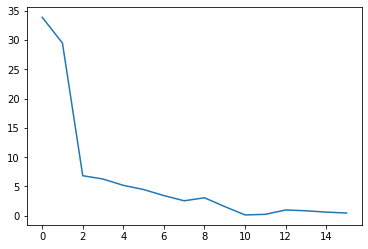

In [169]:
plt.plot(var_exp)

In [114]:
# Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
# We will proceed with 5 components here. And 81% variation are explained by 5 components.

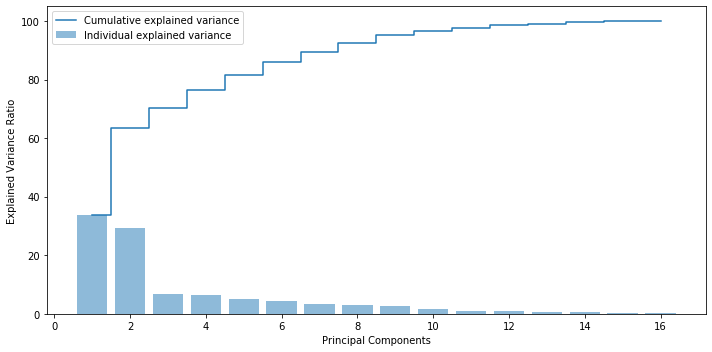

In [115]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Use PCA command from sklearn and find Principal Components

In [170]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# NOTE - we are generating only 5 PCA dimensions (dimensionality reduction from 16 to 5)

pca = PCA(n_components=5)
data_reduced=pca.fit_transform(df_std)
data_reduced.transpose()

# NOTE - we are generating only 5 PCA dimensions (dimensionality reduction from 18 to 5)



array([[-1.25562221, -1.69090889, -1.82118847, ..., -0.3821035 ,
         5.78955684, -0.58273875],
       [ 1.38157047,  0.3508497 , -1.01537223, ..., -0.03054092,
        -2.69998933,  1.64508956],
       [ 0.06549167,  2.36012275, -0.55726953, ...,  0.21446898,
         1.48548049, -0.76161176],
       [-1.01486468,  3.32367963, -0.05902406, ..., -0.59156396,
         0.17908651, -1.244359  ],
       [ 0.17669706, -1.56004988, -1.3194437 , ..., -0.23728166,
        -1.30387882,  0.11507101]])

In [171]:
pca.components_

array([[ 0.3371127 ,  0.31429927,  0.28449068,  0.30744541,  0.31290372,
         0.26364503,  0.11609316,  0.21215968,  0.20496369,  0.12221603,
         0.02911461,  0.33755033,  0.33199756, -0.09654081,  0.1139075 ,
         0.28627676],
       [ 0.23207631,  0.2710232 ,  0.31968903, -0.19979674, -0.15838982,
         0.34219291,  0.3421489 , -0.33084275, -0.20185177,  0.05888107,
         0.23353241, -0.04786101, -0.05992861,  0.30926232, -0.30435999,
        -0.26258764],
       [-0.05609107, -0.08727716, -0.06597607,  0.08475051,  0.06471716,
        -0.06057061, -0.05513728, -0.03928454, -0.00853038,  0.73799878,
         0.54507178, -0.15966476, -0.14646824, -0.23147373, -0.08759595,
         0.12346406],
       [ 0.10331326,  0.12039569,  0.01106601, -0.36507207, -0.41284264,
         0.01432502,  0.22094084,  0.26066295,  0.5804484 ,  0.00202317,
        -0.09203706, -0.17228237, -0.11474341, -0.26573563, -0.22466709,
         0.21140872],
       [-0.2132554 , -0.19403678, -0

In [119]:
pca.explained_variance_ratio_

array([0.33876244, 0.29469189, 0.06830956, 0.06262832, 0.05188385])

In [120]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([33.9, 63.4, 70.2, 76.5, 81.7])

The Cumulative % gives the percentage of variance accounted for by the n components. For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second components. It helps in deciding the number of components by selecting the components which explained the high variance

In the above array we see that the first feature explains 33.9% of the variance within our data set while the first two explain 63.4 and so on. If we employ 5 features we capture ~ 81.7% of the variance within the dataset, thus we gain very little by implementing an additional feature (think of this as diminishing marginal return on total variance explained).

# Correlation between components and features

In [172]:
df_comp = pd.DataFrame(pca.components_,columns=list(df_std))
df_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.337113  0.314299  0.284491   0.307445   0.312904     0.263645   
1  0.232076  0.271023  0.319689  -0.199797  -0.158390     0.342193   
2 -0.056091 -0.087277 -0.065976   0.084751   0.064717    -0.060571   
3  0.103313  0.120396  0.011066  -0.365072  -0.412843     0.014325   
4 -0.213255 -0.194037 -0.188907  -0.220335  -0.182876    -0.125145   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.116093  0.212160    0.204964  0.122216  0.029115  0.337550  0.331998   
1     0.342149 -0.330843   -0.201852  0.058881  0.233532 -0.047861 -0.059929   
2    -0.055137 -0.039285   -0.008530  0.737999  0.545072 -0.159665 -0.146468   
3     0.220941  0.260663    0.580448  0.002023 -0.092037 -0.172282 -0.114743   
4     0.089997 -0.050887    0.174505  0.298633 -0.012437  0.490423  0.539220   

   S.F.Ratio  perc.alumni    Expend  
0  -0.096541     0.113907  0.286277  
1   0.309262    -0.304360 -0.262588  
2  -0.231474    -0.087596  0.123464  
3  -0.265736    -0.224667  0.211409  
4   0.307225    -0.137997 -0.091386

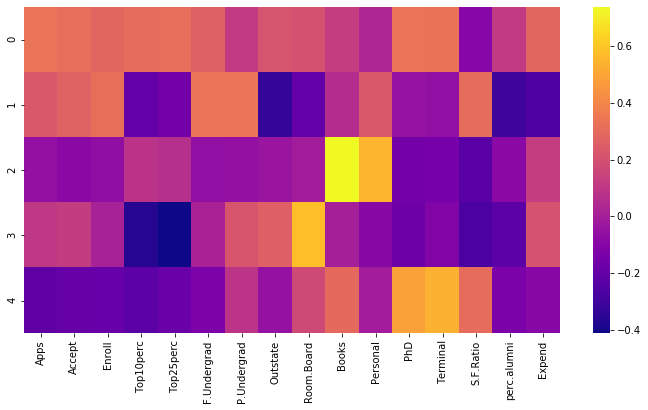

In [174]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma',)

In [ ]:
# This heatmap and the color bar basically represent the correlation between the various feature 
# and the principal component itself
# Component 2 looks more related to aspect  - We can label it as aspect property
# Depending on relations ship, we could go ahead and label relationship with features

PCA is a statistical technique and uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. PCA also is a tool to reduce multidimensional data to lower dimensions while retaining most of the information. Principal Component Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, while keeping as much variation as possible.

This PCA can only be done on continous variables